In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set()

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data cleaning

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
s = df.duplicated()

In [8]:
s.sum()

0

## Encoding

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})

C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\2969846915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})


In [11]:
df['ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20433, dtype: int64

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


## Outliers detection and removal

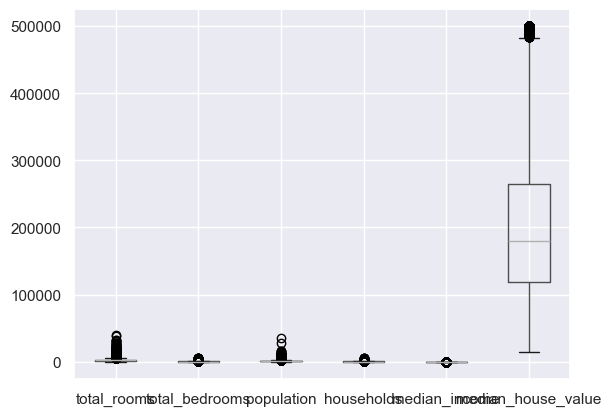

In [13]:
df.boxplot(column = [ 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'])
plt.show() 

In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5* IQR)
lower_bound = Q1 - (1.5 * IQR)

df['total_rooms'] = df['total_rooms'].where(
    (df['total_rooms'] >= lower_bound) & (df['total_rooms'] <= upper_bound)
)
df['total_rooms'].isnull().sum()


C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\3366658908.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_rooms'] = df['total_rooms'].where(


1290

In [16]:
Q11 = df['total_bedrooms'].quantile(0.25)
Q31 = df['total_bedrooms'].quantile(0.75)
IQR1 = Q31 - Q11
upper_bound1 = Q31 + (1.5* IQR1)
lower_bound1 = Q11 - (1.5 * IQR1)

df['total_bedrooms'] = df['total_bedrooms'].where(
    (df['total_bedrooms'] >= lower_bound1) & (df['total_bedrooms'] <= upper_bound1)
)
df['total_bedrooms'].isnull().sum()


C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\4211935472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_bedrooms'] = df['total_bedrooms'].where(


1271

In [17]:
Q12 = df['population'].quantile(0.25)
Q32 = df['population'].quantile(0.75)
IQR2 = Q32 - Q12
upper_bound2 = Q32 + (1.5* IQR2)
lower_bound2 = Q12 - (1.5 * IQR2)

df['population'] = df['population'].where(
    (df['population'] >= lower_bound2) & (df['population'] <= upper_bound2)
)

df['population'].isnull().sum()


C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\3620382773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'] = df['population'].where(


1190

In [18]:
Q13 = df['households'].quantile(0.25)
Q33 = df['households'].quantile(0.75)
IQR3 = Q33 - Q13
upper_bound3 = Q33 + (1.5* IQR3)
lower_bound3 = Q13 - (1.5 * IQR3)

df['households'] = df['households'].where(
    (df['households'] >= lower_bound3) & (df['households'] <= upper_bound3)
)
df['households'].isnull().sum()


C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\4057400708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['households'] = df['households'].where(


1210

In [19]:
Q14 = df['median_income'].quantile(0.25)
Q34 = df['median_income'].quantile(0.75)
IQR4 = Q34 - Q14
upper_bound4 = Q34 + (1.5* IQR4)
lower_bound4 = Q14 - (1.5 * IQR4)

df['median_income'] = df['median_income'].where(
    (df['median_income'] >= lower_bound4) & (df['median_income'] <= upper_bound4)
)
df['median_income'].isnull().sum()

C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\758589355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_income'] = df['median_income'].where(


670

In [20]:
Q15 = df['median_house_value'].quantile(0.25)
Q35 = df['median_house_value'].quantile(0.75)
IQR5 = Q35 - Q15
upper_bound5 = Q35 + (1.5* IQR5)
lower_bound5 = Q15 - (1.5 * IQR5)

df['median_house_value'] = df['median_house_value'].where(
    (df['median_house_value'] >= lower_bound5) & (df['median_house_value'] <= upper_bound5)
)
df['median_house_value'].isnull().sum()

C:\Users\Mihit\AppData\Local\Temp\ipykernel_19352\3959001023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_house_value'] = df['median_house_value'].where(


1064

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [23]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#df['total_rooms']=std_scaler.fit_transform(df[['total_rooms']])
#df['total_bedrooms']=std_scaler.fit_transform(df[['total_bedrooms']])
#df['population']=std_scaler.fit_transform(df[['population']])
#df['households']=std_scaler.fit_transform(df[['households']])
#df['housing_median_age']=std_scaler.fit_transform(df[['housing_median_age']])
#df['median_income']=std_scaler.fit_transform(df[['median_income']])


In [24]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

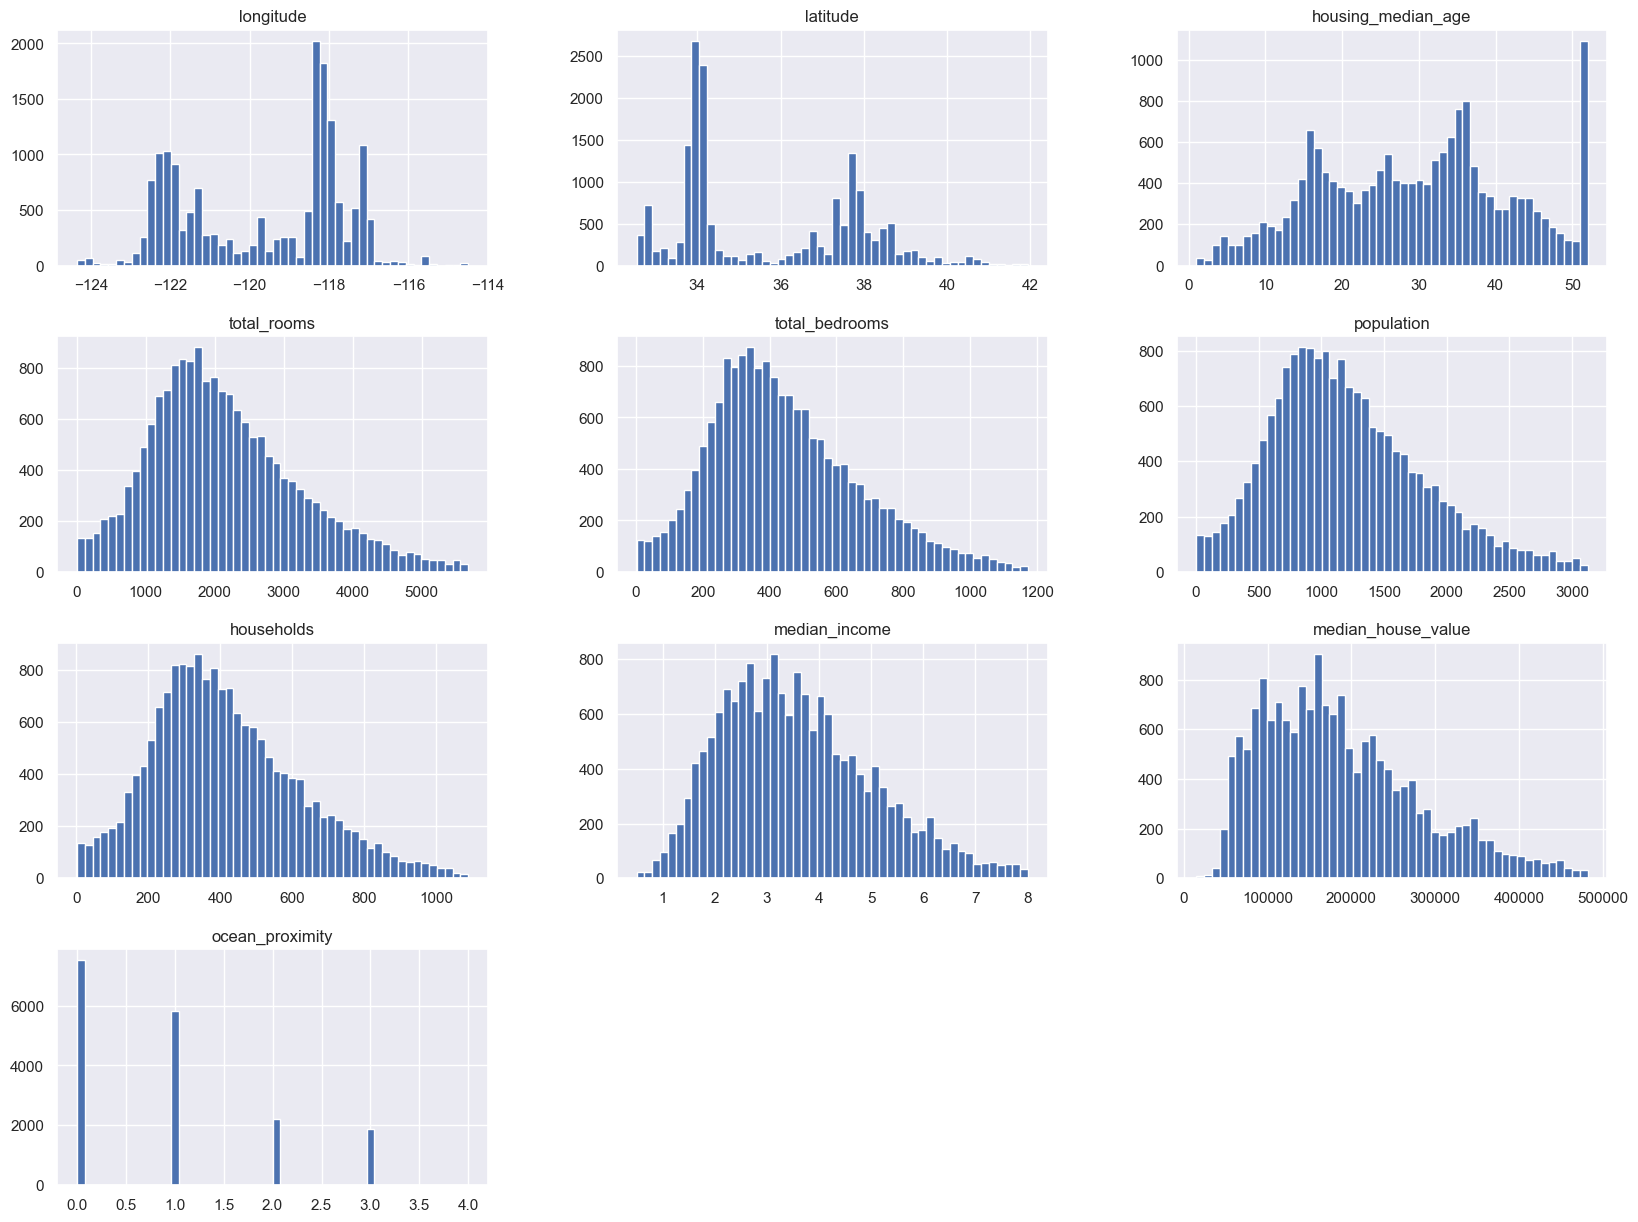

In [25]:
df.hist(bins = 50,figsize = (20,15))
plt.show()

## Model Training

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [27]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity']]

y = df['median_house_value']

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [29]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X_scaled)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [31]:
#X_train = std_scaler.fit_transform(x_train)
#X_test = std_scaler.transform(x_test)
#Y_train = std_scaler.fit_transform(y_train)
#Y_test = std_scaler.transform(y_test)

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor( max_depth=20,min_samples_split=10,min_samples_leaf=5,max_features=None,ccp_alpha=0.01),
    "GradientBoost":GradientBoostingRegressor()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    y_train_mae = mean_absolute_error(y_train,y_train_pred)
    y_train_mse = mean_squared_error(y_train,y_train_pred)
    y_train_r2 = r2_score(y_train,y_train_pred)

    y_test_mae = mean_absolute_error(y_test,y_test_pred)
    y_test_mse = mean_squared_error(y_test,y_test_pred)
    y_test_r2 = r2_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for training set")

    print("- y_train_mae: {:.4f}".format(y_train_mae))
    print("- y_train_mse: {:.4f}".format(y_train_mse))
    print("- y_train_r2: {:.4f}".format(y_train_r2))
    print("---------------------------------------")

    print("Model performance for test set")
    print("- y_test_mae: {:.4f}".format(y_test_mae))
    print("- y_test_mse: {:.4f}".format(y_test_mse))
    print("- y_test_r2: {:.4f}".format(y_test_r2))
    print("========================================")
    print('\n')


Linear Regression
Model performance for training set
- y_train_mae: 43496.3870
- y_train_mse: 3363479714.0553
- y_train_r2: 0.6147
---------------------------------------
Model performance for test set
- y_test_mae: 44286.6659
- y_test_mse: 3504705834.1902
- y_test_r2: 0.6087


Ridge
Model performance for training set
- y_train_mae: 43496.3263
- y_train_mse: 3363479772.3500
- y_train_r2: 0.6147
---------------------------------------
Model performance for test set
- y_test_mae: 44286.7742
- y_test_mse: 3504720685.1366
- y_test_r2: 0.6087


Lasso
Model performance for training set
- y_train_mae: 43496.3676
- y_train_mse: 3363479723.1876
- y_train_r2: 0.6147
---------------------------------------
Model performance for test set
- y_test_mae: 44286.7157
- y_test_mse: 3504713576.7344
- y_test_r2: 0.6087


Random Forest
Model performance for training set
- y_train_mae: 10957.4539
- y_train_mse: 266768283.1431
- y_train_r2: 0.9694
---------------------------------------
Model performance for

## Linear Regression

In [33]:
reg = LinearRegression().fit(x_train,y_train)
y_pred = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)


MAE: 44286.66588344644
MSE: 3504705834.190221
R2: 0.6087232479362905


## Lasso

In [34]:
las = Lasso(tol=0.001, selection= 'random', max_iter= 2000, alpha = 10).fit(x_train,y_train)
y_pred_lasso = las.predict(x_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("MAE:",mae_lasso)
print("MSE:",mse_lasso)
print("R2:",r2_lasso)

MAE: 44287.164333655295
MSE: 3504784114.5891643
R2: 0.6087145084580865


## Ridge

In [35]:
ridg = Ridge().fit(x_train,y_train)
y_pred_ridge = ridg.predict(x_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("MAE:",mae_ridge)
print("MSE:",mse_ridge)
print("R2:",r2_ridge)

MAE: 44286.774156904314
MSE: 3504720685.13658
R2: 0.608721589928363


## Random forest

In [36]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, max_features=5, max_depth= None).fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("MAE:",mae_rf)
print("MSE:",mse_rf)
print("R2:",r2_rf)

MAE: 28721.224473503098
MSE: 1893586224.7073622
R2: 0.7885938783997057


## Hyperparameter tunning

In [37]:
las_params = {
    "alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10],
    "max_iter":[1000,2000,5000, 10000],
    "tol":[1e-4, 1e-5, 1e-3],
    "selection":['cyclic', 'random']
    }
rf_params = {
    "max_depth":[5,8,15,10,None],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [38]:
rf_params

{'max_depth': [5, 8, 15, 10, None],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [39]:
randomcv_models =[
        #("Lasso",Lasso(),las_params),
        ("RF",RandomForestRegressor(),rf_params)]

In [40]:
randomcv_models

[('RF',
  RandomForestRegressor(),
  {'max_depth': [5, 8, 15, 10, None],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,param_distributions = params,n_iter = 100,cv=3,verbose =2,n_jobs = -1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"__________Best params for {model_name}_________")
    print(model_param[model_name])